[[ 8.56581639e+00  1.92221882e+00]
 [ 6.76316142e+00  1.24000198e+00]
 [ 5.95671717e+00  2.15920452e-01]
 [ 1.20028939e+00 -3.62521097e-01]
 [-5.79069537e+00 -1.19574108e+01]
 [ 1.01584597e+01  1.32585969e-01]
 [ 5.80562872e+00 -6.99151505e+00]
 [ 3.07215679e+00  3.30330662e+00]
 [ 4.16169203e+00 -1.25596131e+00]
 [-3.09080961e+00 -4.28207261e+00]
 [-5.18298644e-01 -1.14301064e+01]
 [ 5.99797521e+00 -1.29748010e+01]
 [ 8.40347425e+00 -1.32583066e+01]
 [ 2.27883595e+00 -1.05353818e+01]
 [ 2.41848388e+00 -1.50885217e+00]
 [ 1.27871087e+00  4.14455003e+00]
 [ 7.33988737e+00  3.01941267e+00]
 [ 4.88818149e+00 -7.08384644e+00]
 [ 1.37514920e+01 -5.90510650e+00]
 [-6.30663536e-01 -1.47447215e+01]
 [ 4.52500992e+00 -6.78575419e+00]
 [ 7.40930596e+00  4.62136540e-01]
 [ 7.66232403e+00  3.22646535e+00]
 [ 1.48057624e+00 -7.77177639e+00]
 [-4.44559484e+00 -6.88624204e+00]
 [ 6.64558042e+00 -3.03426688e+00]
 [ 9.08831806e+00 -6.70590143e+00]
 [ 5.18902736e+00 -1.02148390e+01]
 [ 1.05083589e+01 -4

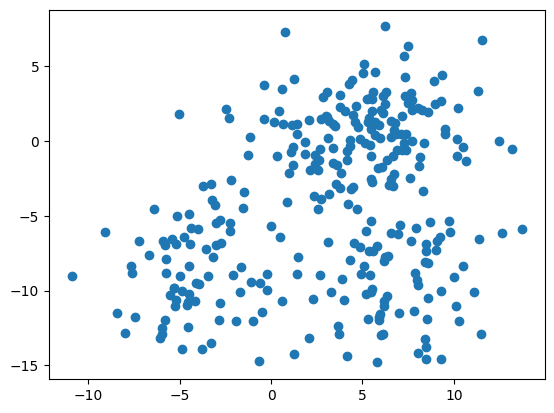

In [1]:
#1. Tạo 300 điểm dữ liệu với 4 phân cụm, và vẽ lên trục tọa độ. (1 điểm)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
points, _ = make_blobs(n_samples=300, centers=4, random_state=99, cluster_std=2.75) # 300 điểm dữ liệu ngẫu nhiên và 4 điểm centroid, dấu _ tượng trưng cho phần còn lại
print(points)
x = points[:, 0]
y = points[:, 1]
plt.scatter(x, y)

In [2]:
#2. Viết hàm tính Phân cụm theo format ở slide số 16. (2 điểm)
def getNumFeatures(dataSet):
    return len(dataSet[0])

def getRandomCentroids(numFeatures, k, dataSet):
    randCentroids = []
    nSample = len(dataSet)
    for i in range(k):
        point = []
        while True:            
            index = np.random.randint(nSample)
            for j in range(numFeatures):
                point.append(dataSet[index][j])
            if point not in randCentroids:
                randCentroids.append(point)
                break
    return np.array(randCentroids)

# plt.scatter(x, y) 
# centroid_points = getRandomCentroids(getNumFeatures(points), 4, points)
# print(f'First centroid point: \n{centroid_points}')
# plt.scatter(centroid_points[:, 0], centroid_points[:, 1], color='red', alpha=0.3)

def shouldStop(oldCentroids, centroids):
    return oldCentroids == centroids

def getLabels(dataSet, centroids):
    labels = []
    for point in dataSet:
        distances = []
        for centroid in centroids:
            distance = np.sqrt((centroid[0] - point[0])**2 + (centroid[1] - point[1])**2)
            distances.append(distance)
        labels.append(distances.index(min(distances)))
    return labels

# labels = getLabels(points, getRandomCentroids(getNumFeatures(points), 4))
# print()

def getCentroids(dataSet, labels, k):
    centroids = []
    pointLabels = []
    for i in range(k):
        pointLabels.append([]) 
    index = 0   
    for label in labels:
        pointLabels[label].append(dataSet[index])
        index += 1
    for i in range(k):
        point = np.array(pointLabels[i])
        xCentroid = sum(point[:, 0])/len(point)
        yCentroid = sum(point[:, 1])/len(point)
        centroids.append([xCentroid, yCentroid])
    return np.array(centroids)
    
# print(getCentroids(points, getLabels(points, getRandomCentroids(getNumFeatures(points), 4)), 4))
# point = getCentroids(points, getLabels(points, getRandomCentroids(getNumFeatures(points), 4)), 4)
# plt.scatter(point[:, 0], point[:, 1], color='yellow', alpha=0.5)

def kmeans(dataSet, k):
    numFeatures = getNumFeatures(dataSet)
    centroids = getRandomCentroids(numFeatures, k, dataSet)
    oldCentroids = None
    while not shouldStop(oldCentroids, centroids).all():
        oldCentroids = centroids
        labels = getLabels(dataSet, centroids)
        centroids = getCentroids(dataSet, labels, k)
    return centroids
# print(f'Last centroid point: \n{kmeans(points, 4)}')
# point = kmeans(points, 4)
# plt.scatter(point[:, 0], point[:, 1], color='yellow', alpha=0.5)

    

NameError: name 'dataset' is not defined

In [75]:
#3. Chạy hàm tính K-means với dữ liệu ở trên. (1 điểm)
centroid_kmeans_points = kmeans(points, 4)
print(centroid_kmeans_points)

[[ 1.82552464 -0.34954115]
 [-4.13096548 -8.87159921]
 [ 6.79456213 -9.45958106]
 [ 7.02357983  1.25611842]]


In [76]:
#4. Viết hàm tính độ lệch khoảng cách trung bình giữa các cụm. (2 điểm)
def distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def averageDistanceClusters(dataSet, centroids, k):
    avgDis = []
    dis = []
    for i in range(k):
        dis.append([])
    labels = getLabels(dataSet, centroids)
    index = 0
    for label in labels:
        dis[label].append(distance(dataSet[index], centroids[label]))
        index += 1
    for i in range(k):
        avgDis.append(sum(dis[i])/len(dis[i]))
    return avgDis

def avgDisDifference(distances, k):
    sumDisDiffrence = 0
    for i in range(k):
        for j in range(i+1, k):
            sumDisDiffrence += abs(distances[i] - distances[j])
    return sumDisDiffrence/k


In [77]:
#5. Chạy hàm tính Phân cụm ở trên 3 lần và in ra độ lệch khoảng cách trung bình giữa các cụm (1 điểm)
index = 0
centroids = []
avgDisDiffs = []
for i in range(3):
    centroid_kmeans_points = kmeans(points, 4)
    avgDisDiff = avgDisDifference(averageDistanceClusters(points, centroid_kmeans_points, 4), 4)
    centroids.append(centroid_kmeans_points)
    avgDisDiffs.append(avgDisDiff)
bestDistance = min(avgDisDiffs)
bestCentroid = centroids[avgDisDiffs.index(bestDistance)]
print(f'Best centroid is: \n{bestCentroid} \nWith distance = {bestDistance}')

Best centroid is: 
[[ -4.05931619  -8.6380298 ]
 [  7.21248215  -3.07761839]
 [  6.288403   -10.34599015]
 [  4.40266343   1.65917262]] 
With distance = 0.2773675779370298


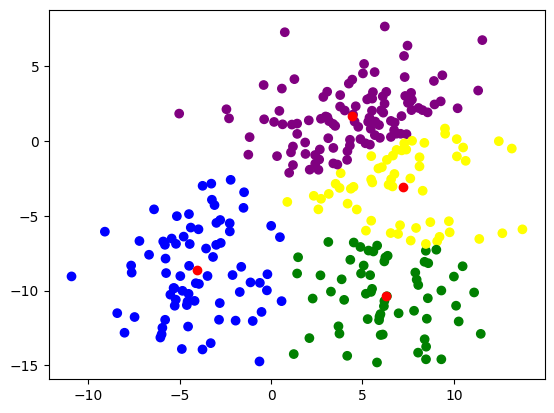

In [78]:
#6. Vẽ centroid và màu khác nhau cho các cụm ở lần phân cụm tốt nhất. (1 điểm)
color_dict = {0: 'blue', 1: 'yellow', 2: 'green', 3: 'purple'}
lables = getLabels(points, bestCentroid)
colors = [color_dict[label] for label in lables]
plt.scatter(x, y, color=colors)
plt.scatter(bestCentroid[:, 0], bestCentroid[:, 1], color='red')


In [79]:
#7. Tạo thêm 1 điểm dữ liệu bất kỳ, tính xem nó thuộc cụm nào với lần phân cụm tốt nhất ở bước 5 (2 điểm)
new_point, _ = make_blobs(1)
print(new_point)
label = getLabels(new_point, bestCentroid)
print(label)

[[-4.58889337  2.67044575]]
[3]


In [80]:
#8. Vẽ tất cả điểm dữ liệu với màu tùy theo cụm, centroid, và điểm đã dự đoán ở trên với màu theo cụm và có marker là kim cương. (1 điểm)